In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns
import sys
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.mixture import GaussianMixture
from sklearn.cluster import Birch
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MeanShift
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [3]:
import warnings; warnings.simplefilter('ignore')

In [4]:
data = pd.read_csv('/content/drive/My Drive/MAJOR PROJECT /Part II/Vectors_10K_final_60.csv')
data

wfs  class  n_1  c_1  p_1  s_1  en_1  t_1  i_1  x_1  ...  i_1785  \
0          wfs_0      0    0    0    0    0     0    0    0    0  ...       0   
1          wfs_1      0    0    0    0    0     0    0    0    0  ...       0   
2          wfs_2      0    0    0    0    0     0    0    0    0  ...       0   
3          wfs_3      0    0    0    0    0     0    0    0    0  ...       0   
4          wfs_4      0    0    0    0    0     0    0    0    0  ...       0   
...          ...    ...  ...  ...  ...  ...   ...  ...  ...  ...  ...     ...   
10869  wfs_10995      0    0    0    0    0     0    0    0    0  ...       0   
10870  wfs_10996      0    0    0    0    0     0    0    0    0  ...       0   
10871  wfs_10997      0    0    0    0    0     0    0    0    0  ...       0   
10872  wfs_10998      0    0    0    0    0     0    0    0    0  ...       0   
10873  wfs_10999      0    0    0    0    0     0    0    0    0  ...       0   

       x_1785  n_1786  c_1786  p_1786  s_1786  en_1786  t_1786  i_1786  x_1786  
0           0       1       1       0       0        1       0       0       0  
1           0       0       0       0       0        0       0       0       0  
2           0       1       0       0       0        0       0       0       0  
3           0       0       0       0       0        0       0       0       0  
4           0       0       0       0       0        0       0       0       0  
...       ...     ...     ...     ...     ...      ...     ...     ...     ...  
10869       0       1       1       0       0        1       0       1       0  
10870       0       1       1       1       0        1       0       0       0  
10871       0       1       1       0       0        1       0       1       0  
10872       0       1       1       1       0        0       0       0       0  
10873       0       1       0       1       0        0       0       0       1  

[10874 rows x 14290 columns]

In [5]:
#df = pd.DataFrame(data)
x = data.drop(['class', 'wfs'], axis = 1)

x.head()

n_1  c_1  p_1  s_1  en_1  t_1  i_1  x_1  n_2  c_2  ...  i_1785  x_1785  \
0    0    0    0    0     0    0    0    0    0    0  ...       0       0   
1    0    0    0    0     0    0    0    0    0    0  ...       0       0   
2    0    0    0    0     0    0    0    0    0    0  ...       0       0   
3    0    0    0    0     0    0    0    0    0    0  ...       0       0   
4    0    0    0    0     0    0    0    0    0    0  ...       0       0   

   n_1786  c_1786  p_1786  s_1786  en_1786  t_1786  i_1786  x_1786  
0       1       1       0       0        1       0       0       0  
1       0       0       0       0        0       0       0       0  
2       1       0       0       0        0       0       0       0  
3       0       0       0       0        0       0       0       0  
4       0       0       0       0        0       0       0       0  

[5 rows x 14288 columns]

In [8]:
kmeans = KMeans(2)
kmeans.fit(x)
clusters=kmeans.labels_
q=data
q['cluster']=clusters
k1=len(q[q['cluster'] == 1].index)
k0=len(q[q['cluster'] == 0].index)

In [9]:
print("Number of workflows in the first cluster (K-means before feature reduction):", k0)
print("Number of workflows in the second cluster (K-means before feature reduction):", k1)
q

Number of workflows in the first cluster (K-means before feature reduction): 4624
Number of workflows in the second cluster (K-means before feature reduction): 6250


wfs  class  n_1  c_1  p_1  s_1  en_1  t_1  i_1  x_1  ...  x_1785  \
0          wfs_0      0    0    0    0    0     0    0    0    0  ...       0   
1          wfs_1      0    0    0    0    0     0    0    0    0  ...       0   
2          wfs_2      0    0    0    0    0     0    0    0    0  ...       0   
3          wfs_3      0    0    0    0    0     0    0    0    0  ...       0   
4          wfs_4      0    0    0    0    0     0    0    0    0  ...       0   
...          ...    ...  ...  ...  ...  ...   ...  ...  ...  ...  ...     ...   
10869  wfs_10995      0    0    0    0    0     0    0    0    0  ...       0   
10870  wfs_10996      0    0    0    0    0     0    0    0    0  ...       0   
10871  wfs_10997      0    0    0    0    0     0    0    0    0  ...       0   
10872  wfs_10998      0    0    0    0    0     0    0    0    0  ...       0   
10873  wfs_10999      0    0    0    0    0     0    0    0    0  ...       0   

       n_1786  c_1786  p_1786  s_1786  en_1786  t_1786  i_1786  x_1786  \
0           1       1       0       0        1       0       0       0   
1           0       0       0       0        0       0       0       0   
2           1       0       0       0        0       0       0       0   
3           0       0       0       0        0       0       0       0   
4           0       0       0       0        0       0       0       0   
...       ...     ...     ...     ...      ...     ...     ...     ...   
10869       1       1       0       0        1       0       1       0   
10870       1       1       1       0        1       0       0       0   
10871       1       1       0       0        1       0       1       0   
10872       1       1       1       0        0       0       0       0   
10873       1       0       1       0        0       0       0       1   

       cluster  
0            0  
1            1  
2            1  
3            1  
4            1  
...        ...  
10869        0  
10870        0  
10871        0  
10872        0  
10873        0  

[10874 rows x 14291 columns]

In [10]:
print(k0)

4624


In [ ]:
birch_model = Birch(threshold=0.03, n_clusters=2)
birch_model.fit(x)
birch_result = birch_model.predict(x)
b=data
b['cluster']=birch_result
b1=len(b[b['cluster'] == 1].index)
b0=len(b[b['cluster'] == 0].index)

In [ ]:
print("Number of workflows in the first cluster (BIRCH model before feature reduction):", b0)
print("Number of workflows in the second cluster (BIRCH model before feature reduction):", b1)
b

Number of workflows in the first cluster (BIRCH model before feature reduction): 2276
Number of workflows in the second cluster (BIRCH model before feature reduction): 1023


0  1  2  3  4  5  6  7  8  9  ...  7032  7033  7034  7035  7036  7037  \
0     1  0  0  0  0  0  0  1  1  0  ...     1     0     0     0     1     0   
1     1  0  0  0  0  0  0  1  1  0  ...     1     0     0     0     1     0   
2     0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
3     0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
4     0  0  0  0  0  0  0  0  0  0  ...     1     1     0     0     1     1   
...  .. .. .. .. .. .. .. .. .. ..  ...   ...   ...   ...   ...   ...   ...   
3294  0  0  0  0  0  0  0  0  0  0  ...     1     1     1     0     0     0   
3295  0  0  0  0  0  0  0  0  0  0  ...     1     1     1     0     0     0   
3296  0  0  0  0  0  0  0  0  0  0  ...     1     1     1     0     0     0   
3297  0  0  0  0  0  0  0  0  0  0  ...     1     1     1     0     0     0   
3298  0  0  0  0  0  0  0  0  0  0  ...     1     1     1     0     0     0   

      7038  7039  7040  cluster  
0        0     0     0        0  
1        0     0     0        0  
2        0     0     0        1  
3        0     0     0        1  
4        0     1     1        0  
...    ...   ...   ...      ...  
3294     1     0     0        0  
3295     1     0     0        0  
3296     1     0     0        0  
3297     1     0     0        0  
3298     1     0     0        0  

[3299 rows x 7042 columns]

In [ ]:
gaussian_model = GaussianMixture(n_components=2)
gaussian_model.fit(x)
gaussian_result = gaussian_model.predict(x)
gaussian_clusters = unique(gaussian_result)
qq=x
qq['cluster']=gaussian_result
g1=len(qq[qq['cluster'] == 1].index)
g0=len(qq[qq['cluster'] == 0].index)

In [ ]:
print("Number of workflows in the first cluster (Gaussian model before feature reduction):", g0)
print("Number of workflows in the second cluster(Gaussian model before feature reduction):", g1)
qq

Number of workflows in the first cluster (Gaussian model before feature reduction): 1464
Number of workflows in the second cluster(Gaussian model before feature reduction): 1835


0  1  2  3  4  5  6  7  8  9  ...  7032  7033  7034  7035  7036  7037  \
0     1  0  0  0  0  0  0  1  1  0  ...     1     0     0     0     1     0   
1     1  0  0  0  0  0  0  1  1  0  ...     1     0     0     0     1     0   
2     0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
3     0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
4     0  0  0  0  0  0  0  0  0  0  ...     1     1     0     0     1     1   
...  .. .. .. .. .. .. .. .. .. ..  ...   ...   ...   ...   ...   ...   ...   
3294  0  0  0  0  0  0  0  0  0  0  ...     1     1     1     0     0     0   
3295  0  0  0  0  0  0  0  0  0  0  ...     1     1     1     0     0     0   
3296  0  0  0  0  0  0  0  0  0  0  ...     1     1     1     0     0     0   
3297  0  0  0  0  0  0  0  0  0  0  ...     1     1     1     0     0     0   
3298  0  0  0  0  0  0  0  0  0  0  ...     1     1     1     0     0     0   

      7038  7039  7040  cluster  
0        0     0     0        1  
1        0     0     0        1  
2        0     0     0        1  
3        0     0     0        1  
4        0     1     1        1  
...    ...   ...   ...      ...  
3294     1     0     0        0  
3295     1     0     0        0  
3296     1     0     0        0  
3297     1     0     0        0  
3298     1     0     0        0  

[3299 rows x 7042 columns]

In [ ]:
agglomerative_model = AgglomerativeClustering(n_clusters=2)
agglomerative_result = agglomerative_model.fit_predict(x)
ag=x
ag['cluster']=gaussian_result
a1=len(ag[ag['cluster'] == 1].index)
a0=len(ag[ag['cluster'] == 0].index)

In [ ]:
print("Number of workflows in the first cluster (Agglomerative model before feature reduction):", a0)
print("Number of workflows in the second cluster(Agglomerative model beforefeature reduction):", a1)
ag

Number of workflows in the first cluster (Agglomerative model before feature reduction): 1464
Number of workflows in the second cluster(Agglomerative model beforefeature reduction): 1835


0  1  2  3  4  5  6  7  8  9  ...  7032  7033  7034  7035  7036  7037  \
0     1  0  0  0  0  0  0  1  1  0  ...     1     0     0     0     1     0   
1     1  0  0  0  0  0  0  1  1  0  ...     1     0     0     0     1     0   
2     0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
3     0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
4     0  0  0  0  0  0  0  0  0  0  ...     1     1     0     0     1     1   
...  .. .. .. .. .. .. .. .. .. ..  ...   ...   ...   ...   ...   ...   ...   
3294  0  0  0  0  0  0  0  0  0  0  ...     1     1     1     0     0     0   
3295  0  0  0  0  0  0  0  0  0  0  ...     1     1     1     0     0     0   
3296  0  0  0  0  0  0  0  0  0  0  ...     1     1     1     0     0     0   
3297  0  0  0  0  0  0  0  0  0  0  ...     1     1     1     0     0     0   
3298  0  0  0  0  0  0  0  0  0  0  ...     1     1     1     0     0     0   

      7038  7039  7040  cluster  
0        0     0     0        1  
1        0     0     0        1  
2        0     0     0        1  
3        0     0     0        1  
4        0     1     1        1  
...    ...   ...   ...      ...  
3294     1     0     0        0  
3295     1     0     0        0  
3296     1     0     0        0  
3297     1     0     0        0  
3298     1     0     0        0  

[3299 rows x 7042 columns]

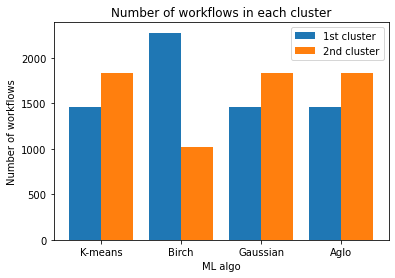

In [ ]:
X = ['K-means','Birch','Gaussian','Aglo']
Y0 = [k0,b0,g0,a0]
Z1 = [k1,b1,g1,a1]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Y0, 0.4, label = '1st cluster')
plt.bar(X_axis + 0.2, Z1, 0.4, label = '2nd cluster')
plt.xticks(X_axis, X)
plt.xlabel("ML algo")
plt.ylabel("Number of workflows")
plt.title("Number of workflows in each cluster")
plt.legend()
plt.show()

In [15]:
sud=np.array(q[q['cluster'] == 0])


In [ ]:
sud.tolist()

In [16]:
list2 = []
for i in range(len(sud)):
  list2.append(sud[i][0])

In [17]:
print(list2)

['wfs_0', 'wfs_6', 'wfs_10', 'wfs_22', 'wfs_23', 'wfs_26', 'wfs_27', 'wfs_29', 'wfs_30', 'wfs_33', 'wfs_35', 'wfs_36', 'wfs_39', 'wfs_47', 'wfs_48', 'wfs_56', 'wfs_58', 'wfs_59', 'wfs_60', 'wfs_61', 'wfs_62', 'wfs_63', 'wfs_64', 'wfs_65', 'wfs_66', 'wfs_73', 'wfs_77', 'wfs_83', 'wfs_85', 'wfs_89', 'wfs_90', 'wfs_92', 'wfs_93', 'wfs_95', 'wfs_98', 'wfs_100', 'wfs_101', 'wfs_102', 'wfs_104', 'wfs_106', 'wfs_107', 'wfs_109', 'wfs_110', 'wfs_111', 'wfs_112', 'wfs_113', 'wfs_114', 'wfs_115', 'wfs_116', 'wfs_117', 'wfs_119', 'wfs_124', 'wfs_125', 'wfs_126', 'wfs_127', 'wfs_129', 'wfs_130', 'wfs_131', 'wfs_132', 'wfs_133', 'wfs_143', 'wfs_145', 'wfs_146', 'wfs_148', 'wfs_149', 'wfs_150', 'wfs_151', 'wfs_152', 'wfs_153', 'wfs_154', 'wfs_160', 'wfs_170', 'wfs_176', 'wfs_178', 'wfs_180', 'wfs_183', 'wfs_184', 'wfs_185', 'wfs_186', 'wfs_187', 'wfs_201', 'wfs_202', 'wfs_203', 'wfs_204', 'wfs_205', 'wfs_206', 'wfs_209', 'wfs_210', 'wfs_212', 'wfs_213', 'wfs_214', 'wfs_215', 'wfs_216', 'wfs_218', 'w

In [18]:
vul=['wfs_58', 'wfs_89', 'wfs_95', 'wfs_427', 'wfs_601', 'wfs_867', 'wfs_895', 'wfs_1002', 'wfs_139', 'wfs_1527', 'wfs_1543', 'wfs_1776', 'wfs_1813', 'wfs_1846', 'wfs_2056', 'wfs_2140', 'wfs_2141', 'wfs_2435', 'wfs_2471', 'wfs_2979', 'wfs_3280', 'wfs_3649', 'wfs_3909', 'wfs_3996', 'wfs_4049', 'wfs_4063', 'wfs_4066', 'wfs_4193', 'wfs_4509', 'wfs_4695', 'wfs_5093', 'wfs_5568', 'wfs_5612', 'wfs_5650', 'wfs_5893', 'wfs_5942', 'wfs_6449', 'wfs_7015', 'wfs_7032', 'wfs_7231', 'wfs_7344', 'wfs_7539', 'wfs_7540', 'wfs_8218', 'wfs_8324', 'wfs_8424', 'wfs_8788', 'wfs_9567', 'wfs_9633', 'wfs_9722', 'wfs_10064', 'wfs_10235', 'wfs_10236', 'wfs_10273', 'wfs_10286', 'wfs_10655', 'wfs_10708']
nak=[]
for i in list2:
    for j in vul:
        if(i==j):
            nak.append(i)
print(nak)
len(nak)

['wfs_58', 'wfs_89', 'wfs_95', 'wfs_427', 'wfs_601', 'wfs_867', 'wfs_895', 'wfs_1002', 'wfs_1527', 'wfs_1543', 'wfs_1776', 'wfs_1813', 'wfs_1846', 'wfs_2056', 'wfs_2140', 'wfs_2141', 'wfs_2435', 'wfs_2471', 'wfs_2979', 'wfs_3280', 'wfs_3649', 'wfs_3909', 'wfs_3996', 'wfs_4049', 'wfs_4063', 'wfs_4193', 'wfs_4509', 'wfs_4695', 'wfs_5093', 'wfs_5568', 'wfs_5612', 'wfs_5650', 'wfs_5893', 'wfs_5942', 'wfs_6449', 'wfs_7015', 'wfs_7032', 'wfs_7231', 'wfs_7344', 'wfs_7539', 'wfs_7540', 'wfs_8218', 'wfs_8324', 'wfs_8424', 'wfs_8788', 'wfs_9567', 'wfs_9633', 'wfs_9722', 'wfs_10064', 'wfs_10235', 'wfs_10236', 'wfs_10273', 'wfs_10286', 'wfs_10655', 'wfs_10708']


55